In [1]:
import os 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import splitfolders


import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Input,concatenate
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam


In [2]:
# Path where our data is located
base_path = "C:/Users/Dell/Downloads/GSASLdatasets/train/"

# Dictionary to save our 29 classes
categories = {  0: "A",
                1: "B",
                2: "C",
                3: "D",
                4: "E",
                5: "F",
                6: "G",
                7: "H",
                8: "I",
                9: "J",
                10: "K",
                11: "L",
                12: "M",
                13: "N",
                14: "O",
                15: "P",
                16: "Q",
                17: "R",
                18: "S",
                19: "T",
                20: "U",
                21: "V",
                22: "W",
                23: "X",
                24: "Y",
                25: "Z",
                26: "del",
                27: "nothing",
                28: "space",
            }

def add_class_name_prefix(df, col_name):
    df[col_name]
    return df


# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [3]:
df


filename  category
0      bw_nothing1639.jpg        27
1            bw_S2856.jpg        18
2            bw_M1306.jpg        12
3            bw_H2492.jpg         7
4            bw_H3000.jpg         7
...                   ...       ...
69595      bw_del2539.jpg        26
69596        bw_A2622.jpg         0
69597         bw_A479.jpg         0
69598      bw_del1938.jpg        26
69599        bw_C2885.jpg         2

[69600 rows x 2 columns]

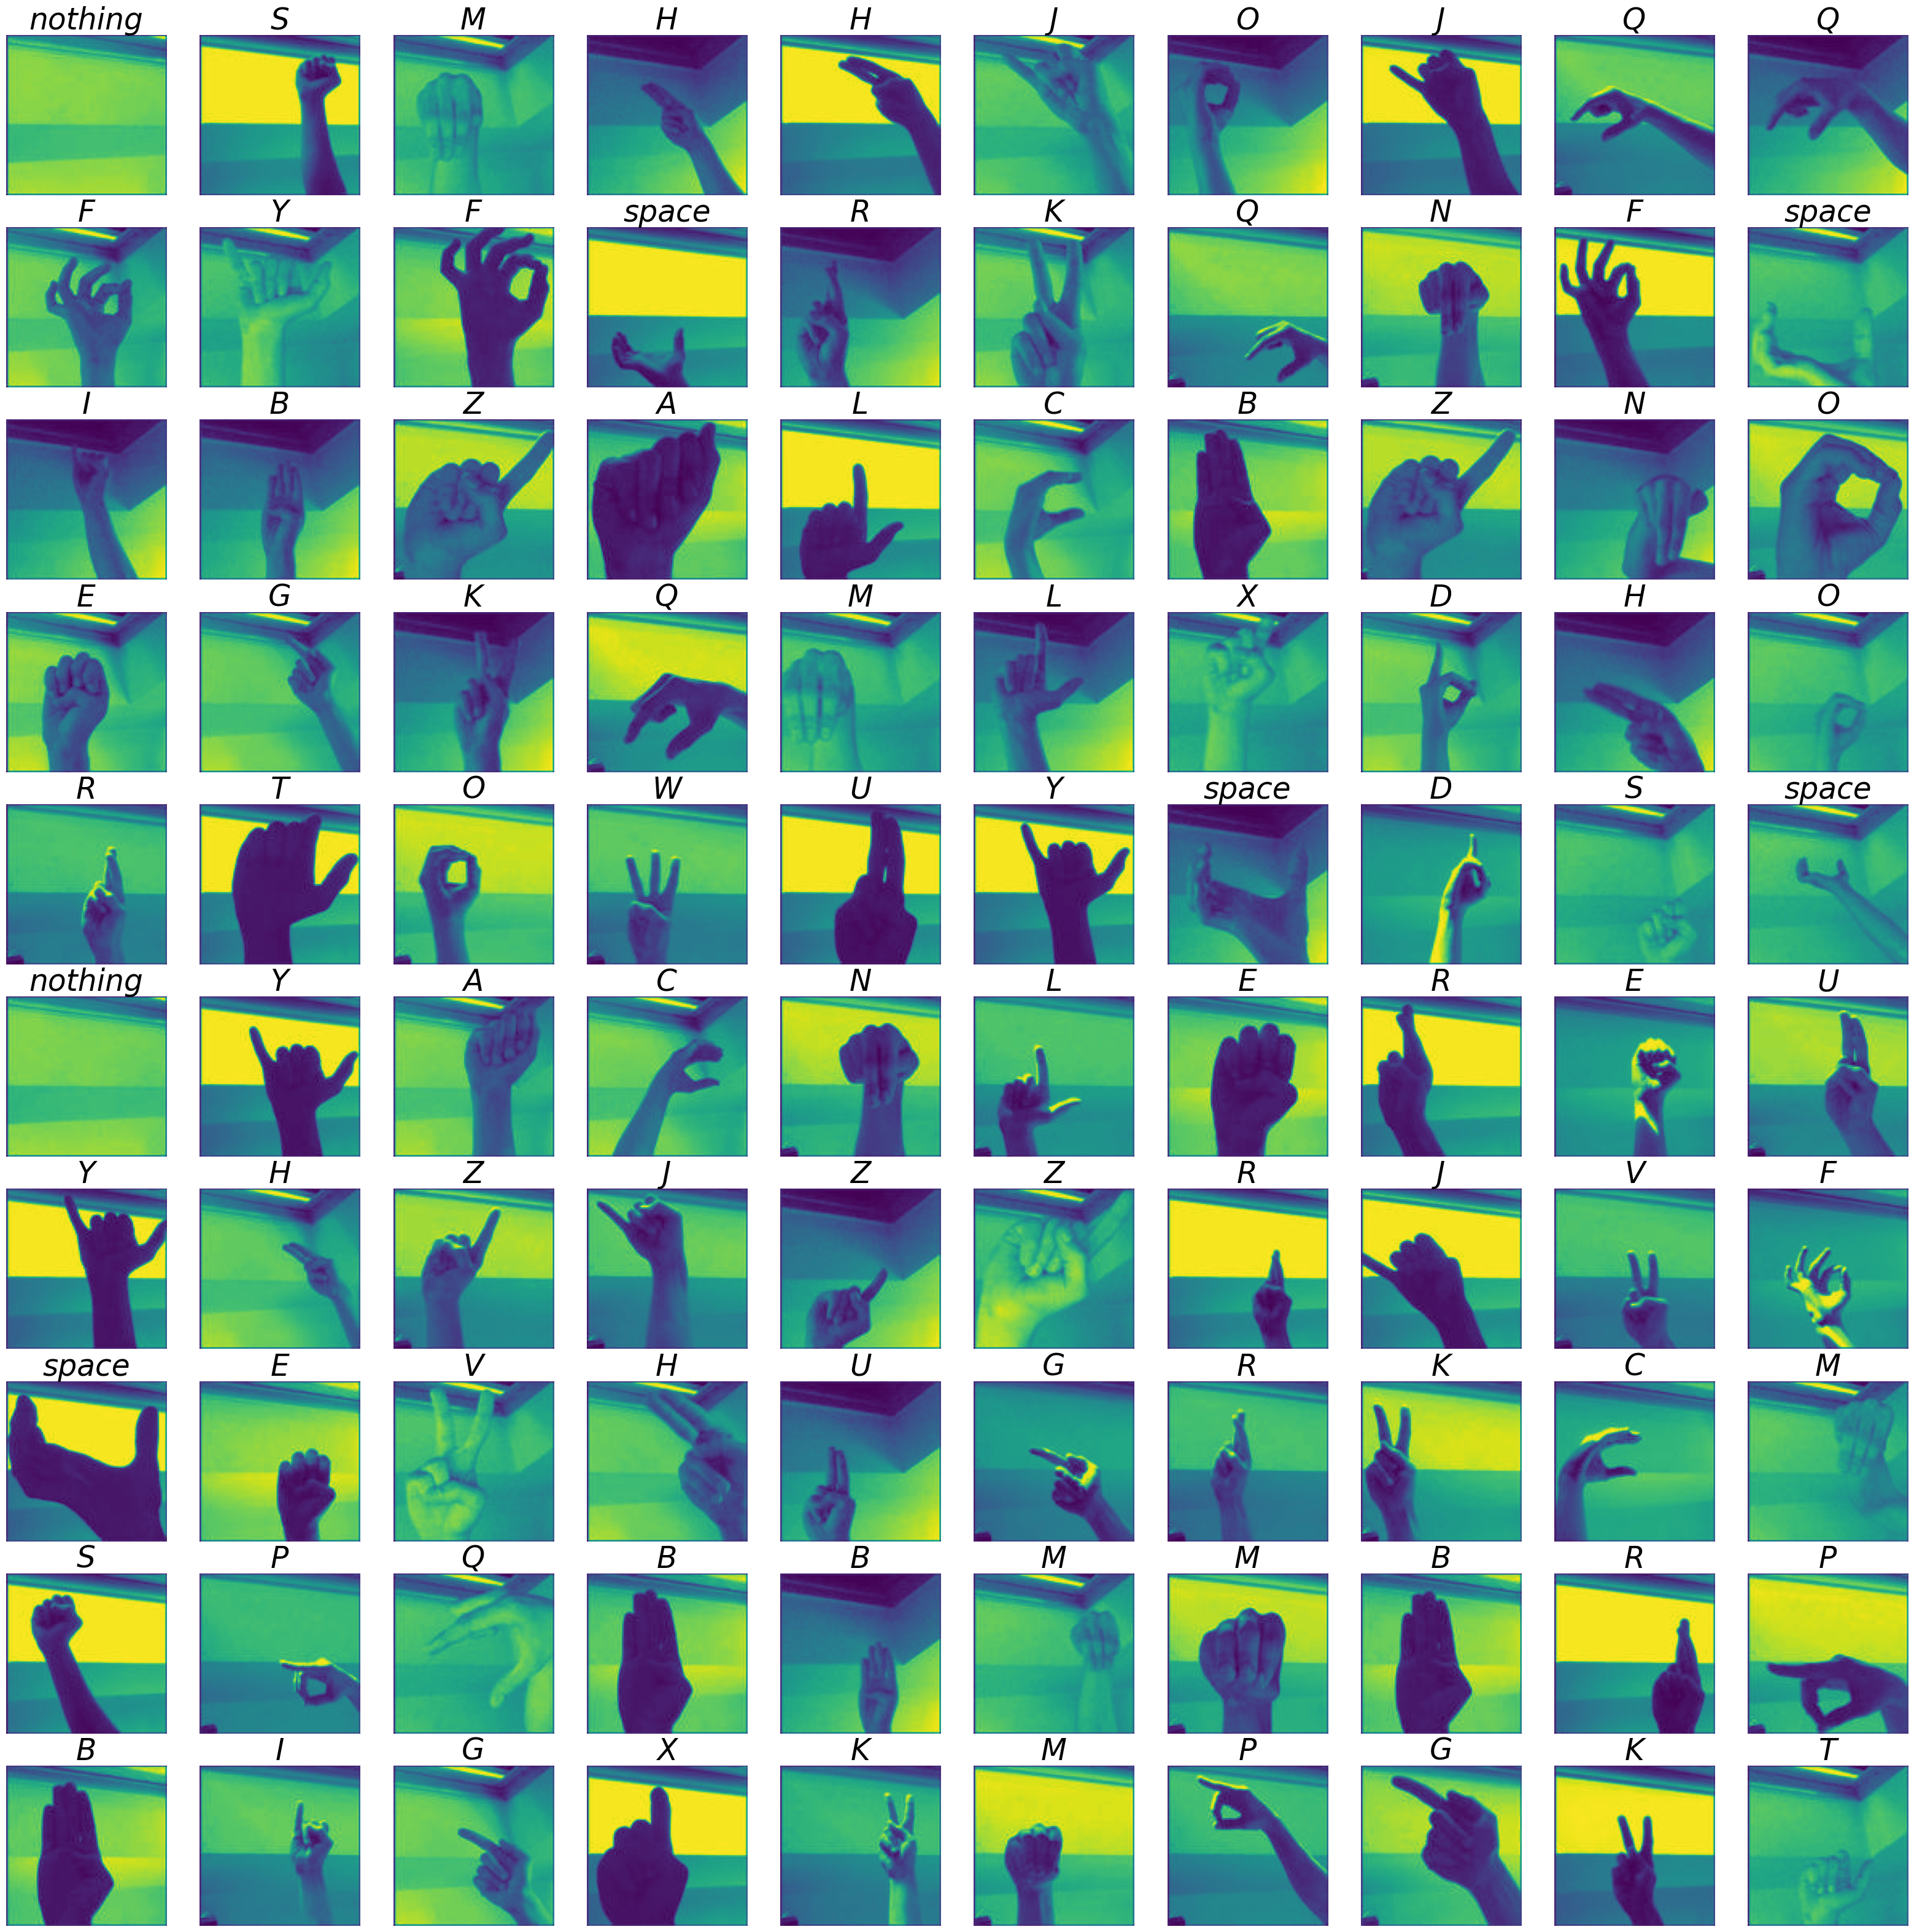

In [4]:
plt.figure(figsize=(40,40))

for i in range(100):
    path = ""
    path = os.path.join(base_path, categories[df.category[i]], df.filename[i])
    img = plt.imread(path)
    plt.subplot(10,10, i + 1)
    plt.imshow(img)
    plt.title(categories[df.category[i]],fontsize=35,fontstyle='italic')
    plt.axis("off")

In [24]:
datagen = ImageDataGenerator(rescale=1.0 / 255,
                             rotation_range=15,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [26]:
train_path = 'C:/Users/Dell/Downloads/GSASLdatasets/train/'
val_path = 'C:/Users/Dell/Downloads/GSASLdatasets/val/'
test_path = 'C:/Users/Dell/Downloads/GSASLdatasets/test/'

# Define hyperparameters and parameters
batch_size = 32
image_size = 100
img_channel = 1
num_classes = 29
learning_rate = 0.01

In [27]:
train_data = datagen.flow_from_directory(directory=train_path,
                                         target_size=(image_size, image_size),
                                         batch_size=batch_size,
                                          color_mode='grayscale',
                                         class_mode='categorical')

val_data = datagen.flow_from_directory(directory=val_path,
                                       target_size=(image_size, image_size),
                                       batch_size=batch_size,
                                        color_mode='grayscale',
                                       class_mode='categorical')

test_data = datagen.flow_from_directory(directory=test_path,
                                        target_size=(image_size, image_size),
                                        batch_size=batch_size,
                                         color_mode='grayscale',
                                        class_mode='categorical',
                                        shuffle=False)

Found 69600 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [1]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(64, 3, activation='relu', padding='same', input_shape=(image_size, image_size, img_channel)))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

NameError: name 'Sequential' is not defined

In [ ]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=6, activation='softmax')
    ])
    
    return model

In [29]:
# optimizer = Adam(learning_rate=learning_rate)
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, restore_best_weights=True, verbose=1)
reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.6, verbose=1)


In [31]:
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=15,
                    callbacks=[early_stopping, reduce_learning_rate],
                    verbose=1)

Epoch 1/15
2175/2175 [==============================] - 6309s 3s/step - loss: 3.2594 - accuracy: 0.0723 - val_loss: 2.9168 - val_accuracy: 0.1431 - lr: 0.0100
Epoch 2/15
2175/2175 [==============================] - 6004s 3s/step - loss: 2.7131 - accuracy: 0.1857 - val_loss: 2.1402 - val_accuracy: 0.3237 - lr: 0.0100
Epoch 3/15
2175/2175 [==============================] - 5868s 3s/step - loss: 2.0240 - accuracy: 0.3567 - val_loss: 1.7151 - val_accuracy: 0.4347 - lr: 0.0100
Epoch 4/15
2175/2175 [==============================] - 6028s 3s/step - loss: 1.4989 - accuracy: 0.5020 - val_loss: 1.1617 - val_accuracy: 0.6103 - lr: 0.0100
Epoch 5/15
2175/2175 [==============================] - 6186s 3s/step - loss: 1.1562 - accuracy: 0.6059 - val_loss: 0.8060 - val_accuracy: 0.7321 - lr: 0.0100
Epoch 6/15
2175/2175 [==============================] - 6186s 3s/step - loss: 0.9187 - accuracy: 0.6829 - val_loss: 0.5944 - val_accuracy: 0.7969 - lr: 0.0100
Epoch 7/15
2175/2175 [========================

In [32]:
model.save('GSASLmodel.h5')

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
